<a href="https://colab.research.google.com/github/OMWANDHOJR/Kaggle-Competition/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read in data abd NLTK basis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

IMPORT DATA

In [ ]:
df = pd.read_csv('/kaggle/Reviews.csv', on_bad_lines='skip', quoting=3)

<ipython-input-22-4a3bb80fc3ac>:1: DtypeWarning: Columns (0,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/Reviews.csv', on_bad_lines='skip', quoting=3)


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df.describe()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
count,459801,459796,459790,459754,459776,459766,459763,459758,459710,459739
unique,319888,53008,146644,127648,452,243,46,5344,134878,184537
top,487980,B007JFMH8M,AZV26LP92E6WU,Chris,0,0,5,1350345600,Delicious,"""Great product"
freq,2,1426,301,316,267280,205189,271113,1052,2284,141


In [ ]:
df.dtypes

,0
Id,object
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,object
HelpfulnessDenominator,object
Score,object
Time,object
Summary,object
Text,object


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,5
UserId,11
ProfileName,47
HelpfulnessNumerator,25
HelpfulnessDenominator,35
Score,38
Time,43
Summary,91
Text,62


In [ ]:
df['Summary'].fillna('Not filled', inplace=True)
df['ProfileName'].fillna('Unknown', inplace=True)

<ipython-input-27-228e9ff463b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Summary'].fillna('Not filled', inplace=True)
<ipython-input-27-228e9ff463b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.shape

(459801, 10)

In [ ]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))

TypeError: '<' not supported between instances of 'int' and 'str'

<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Score'>

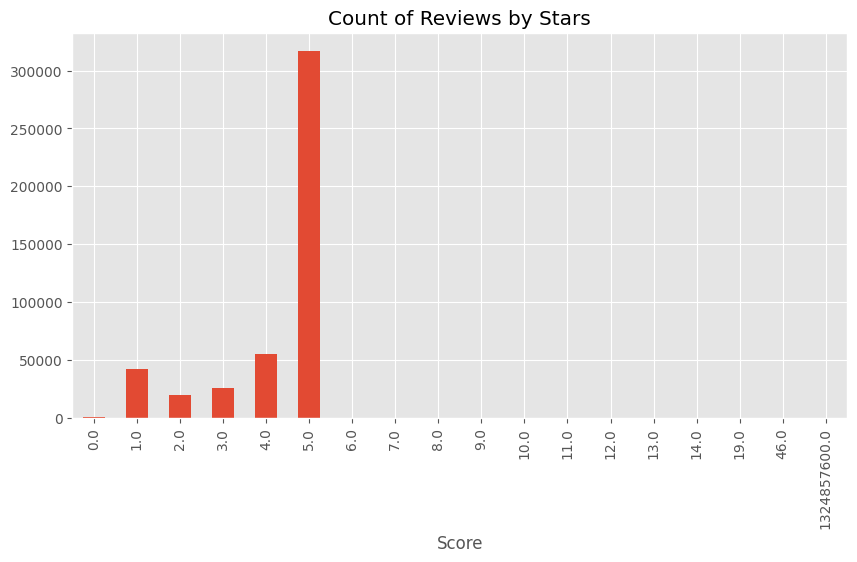

In [ ]:
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))

Basci NLKT

In [ ]:
example = df['Text'][500]
print(example)

I am in love with POP Chips! They are my go to low calorie snack! The largest 100 calorie pack out there!


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
tokens = nltk.word_tokenize(example)

tokens[:10]

['I', 'am', 'in', 'love', 'with', 'POP', 'Chips', '!', 'They', 'are']

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)[:10]

In [ ]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)

entities.pprint()

(S
  I/PRP
  am/VBP
  in/IN
  love/NN
  with/IN
  (ORGANIZATION POP/NNP Chips/NNP)
  !/.
  They/PRP
  are/VBP)


Step 1: using VADER sentiment scoring

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('Iam so fucking tired')

{'neg': 0.536, 'neu': 0.464, 'pos': 0.0, 'compound': -0.5379}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.08, 'neu': 0.726, 'pos': 0.194, 'compound': 0.6093}

Run Polarity scores on dataset

In [ ]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)

  0%|          | 0/459801 [00:00<?, ?it/s]

AttributeError: 'float' object has no attribute 'encode'

In [ ]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    # Check if 'text' is a string and not NaN
    if isinstance(text, str) and text == text:  # Check for NaN using self-equality
        results[myid] = sia.polarity_scores(text)
    else:
        # Handle NaN or non-string values (e.g., skip, replace with empty string)
        print(f"Skipping record with id {myid} due to invalid text.")
        # Or: results[myid] = sia.polarity_scores("")

  0%|          | 0/459801 [00:00<?, ?it/s]

Skipping record with id 94241 due to invalid text.
Skipping record with id 96223 due to invalid text.
Skipping record with id 98053 due to invalid text.
Skipping record with id 16243 due to invalid text.
Skipping record with id 29941 due to invalid text.
Skipping record with id 34192 due to invalid text.
Skipping record with id 47919 due to invalid text.
Skipping record with id 137444 due to invalid text.
Skipping record with id 142748 due to invalid text.
Skipping record with id especially if using the Keurig to make a large cup of coffee.  I highly recommend this if you like strong coffee and brew a large cup with your Keurig." due to invalid text.
Skipping record with id 86989 due to invalid text.
Skipping record with id 96223 due to invalid text.
Skipping record with id 98053 due to invalid text.
Skipping record with id 106337 due to invalid text.
Skipping record with id 193290 due to invalid text.
Skipping record with id 120093 due to invalid text.
Skipping record with id 124292 d

In [ ]:
results

{'1': {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 '2': {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 '4': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 '9': {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 '10': {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 '14': {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 '15': {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 '17': {'neg': 0.097, 'neu': 0.694, 'pos': 0.209, 'compound': 0.7481},
 '18': {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883},
 '20': {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077},
 '23': {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687},
 '24': {'neg': 0.085, 'neu': 0.771, 'pos': 0.143, 'compound': 0.2617},
 '28': {'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956},
 '43': {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441},
 '45': {'neg': 0.031, 'neu': 0.778, 'po

In [ ]:
vaders = pd.DataFrame(results).T

In [ ]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5.0,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


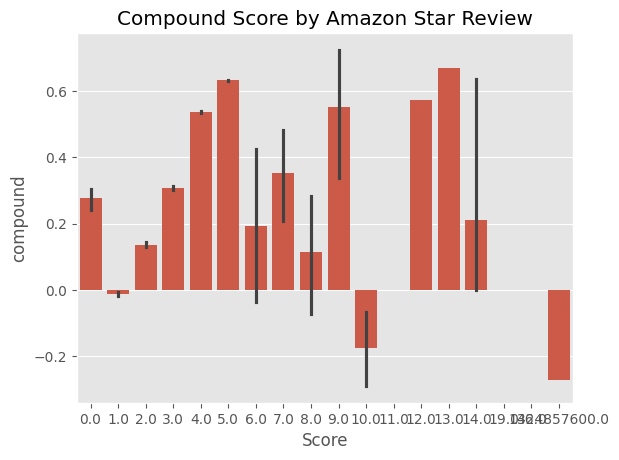

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

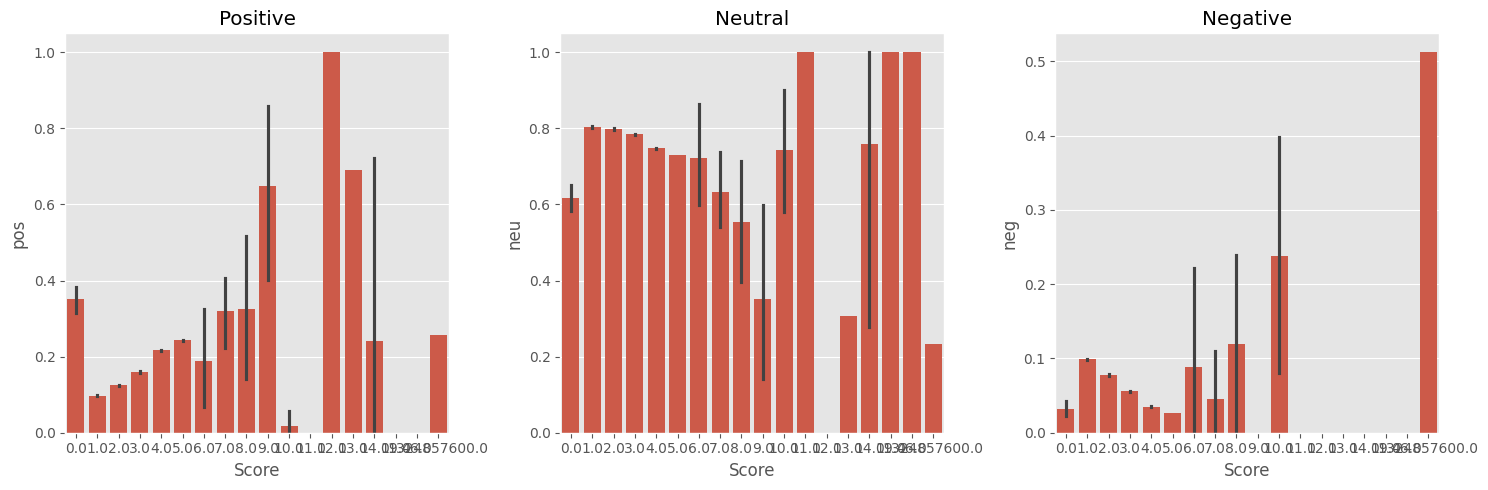

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax =axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax =axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax =axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Pretrained Model

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
Model = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(example)
sia.polarity_scores(example)

I am in love with POP Chips! They are my go to low calorie snack! The largest 100 calorie pack out there!


{'neg': 0.08, 'neu': 0.726, 'pos': 0.194, 'compound': 0.6093}

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()

In [ ]:
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.001204611), 'roberta_neu': np.float32(0.007106118), 'roberta_pos': np.float32(0.9916892)}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
      text = row['Text']
      myid = row['Id']
      # Check if 'text' is a string and not NaN
      if isinstance(text, str) and text == text:  # Check for NaN using self-equality
          vader_result = sia.polarity_scores(text)
          vader_result_rename = {}
          for key, value in vader_result.items():
              vader_result_rename[f'vader_{key}'] = value
          roberta_results = {}
          results[myid] = {**vader_result_rename, **roberta_results}
  except:
      pass # This handles any error that could happen inside the try block.

  0%|          | 0/459801 [00:00<?, ?it/s]

In [ ]:
results = pd.DataFrame(results).T

In [ ]:
results

,vader_neg,vader_neu,vader_pos,vader_compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
4,0.000,1.000,0.000,0.0000
9,0.000,0.851,0.149,0.6369
10,0.000,0.705,0.295,0.8313
...,...,...,...,...
568450,0.072,0.600,0.327,0.8589
568451,0.199,0.739,0.062,-0.6365
568452,0.000,1.000,0.000,0.0000
568453,0.041,0.506,0.452,0.9717


In [ ]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
      text = row['Text']
      myid = row['Id']
      # Check if 'text' is a string and not NaN
      if isinstance(text, str) and text == text:  # Check for NaN using self-equality
          vader_result = sia.polarity_scores(text)
          vader_result_rename = {}
          for key, value in vader_result.items():
              vader_result_rename[f'vader_{key}'] = value

          # Get Roberta scores
          roberta_results = polarity_scores_roberta(text)

          # Combine results
          both = {**vader_result_rename, **roberta_results}
          results[myid] = both
  except RuntimeError:
      print(f'Broke for id {myid}') # Handle RuntimeError specifically
  except Exception as e:
      print(f"An unexpected error occurred for id {myid}: {e}") # Handle other errors
# %%
results = pd.DataFrame(results).T
# %%
results

  0%|          | 0/459801 [00:00<?, ?it/s]

Broke for id 18321
